In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100)
path = "Cartwheeldata.csv"

In [2]:
df = pd.read_csv("Cartwheeldata.csv")

In [3]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


¿Cómo describirías la relación entre "Altura" y "Envergadura"?
Preguntas que puedes hacer:

¿Es lineal?
¿Hay valores atípicos?
¿Son sus rangos similares o diferentes?
¿De qué otra forma podrías describir la relación?

Ahora veamos dos variables que todavía no suponemos que tengan una relación fuerte, 'Wingspan' y 'CWDistance'

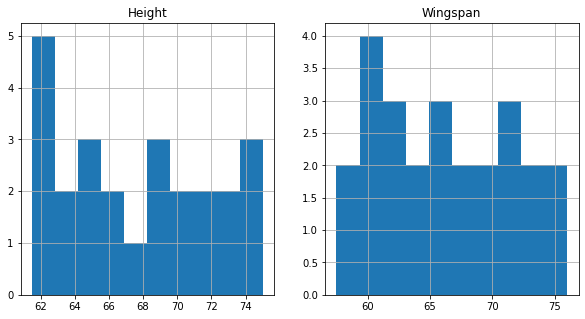

In [13]:
# Distribución
plt.figure(figsize=(10,5))
plt.grid()
plt.subplot(1,2,1)
plt.hist(x=df.Height)
plt.title("Height")
plt.grid()
# Trazando Y
plt.subplot(1,2,2)
plt.hist(x=df.Wingspan)
plt.title("Wingspan")
plt.grid()

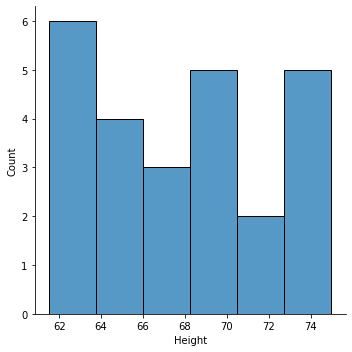

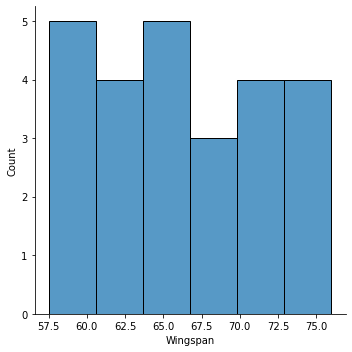

In [14]:
sns.displot(df.Height)
sns.displot(df.Wingspan)

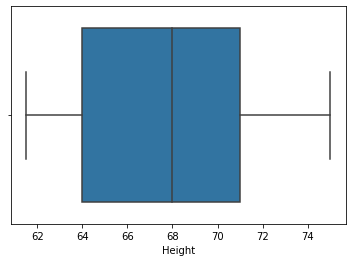

<AxesSubplot:xlabel='Wingspan'>

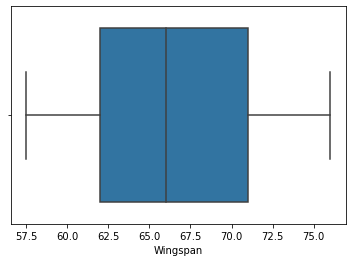

In [21]:
sns.boxplot(x=df.Height)
plt.show()
sns.boxplot(x=df.Wingspan)

<AxesSubplot:xlabel='Height', ylabel='Wingspan'>

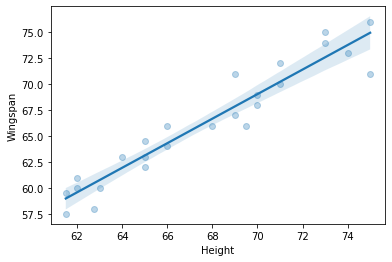

In [7]:
sns.regplot(x="Height", y="Wingspan",data=df , scatter_kws={"alpha":0.3})

In [5]:
dP = df[["Height", "Wingspan"]].dropna()
r, p = stats.pearsonr(dP.Height, dP.Wingspan) # -> esta es una forma de gráficar e incluir r y p, pero estos datos deben tener la misma longitud
print(r,p)
# r -> correlación
# p -> p-valor

0.9540180704953922 1.5868358307934386e-13


En primera medida podemos observar que tiene una correlación/asociación positiva alta, que indican que a medida que aumenta la estatura, igualmente aumenta la envergadura. Observamos que no hay una distribución similar, pudiento ver en la variable Emvergadura  un comportamiento bimodal, igualmente, la variable Altura evidencia un comportamiento unimodal sesgado hacia la derecha. Ambas variables no evidencian datos atipicos.   

In [23]:
dP = df[["CWDistance", "Wingspan"]].dropna()
r, p = stats.pearsonr(dP.CWDistance, dP.Wingspan) # -> esta es una forma de gráficar e incluir r y p, pero estos datos deben tener la misma longitud
print(r,p)
# r -> correlación
# p -> p-valor

0.2976618436234315 0.1484274577822956


<AxesSubplot:xlabel='CWDistance', ylabel='Wingspan'>

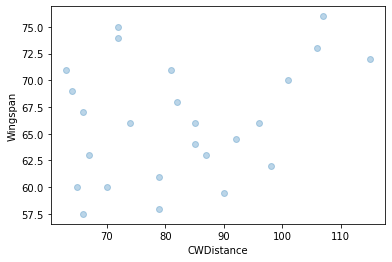

In [25]:
sns.regplot(x="CWDistance", y="Wingspan",data=df,fit_reg=False , scatter_kws={"alpha":0.3})

La correlación entre la variable Wingspan (envergadura) y CWDistance (distancia rueda de carro) presentan es baja, estando sobre los 0.3 y no se evidencia que la relación sea líneal, por lo que se concluye que la asociación entre estas variables es baja y es no lineal. 

¿Cómo describiría la relación entre "Wingspan" y "CWDistance"?

¿Es lineal?
¿Hay valores atípicos?
¿Son sus rangos similares o diferentes?
¿De qué otra forma podrías describir la relación?

Hagamos el mismo gráfico que el anterior, pero ahora incluyamos "Género" como esquema de color incluyendo el argumento

hue=df['Género']
en la función Seaborn

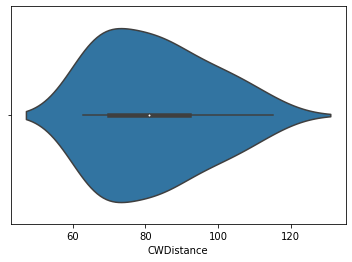

<AxesSubplot:xlabel='Wingspan'>

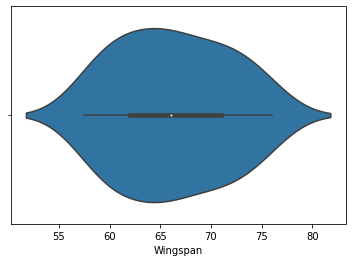

In [30]:
sns.violinplot(x=df.CWDistance)
plt.show()
sns.violinplot(x=df.Wingspan)

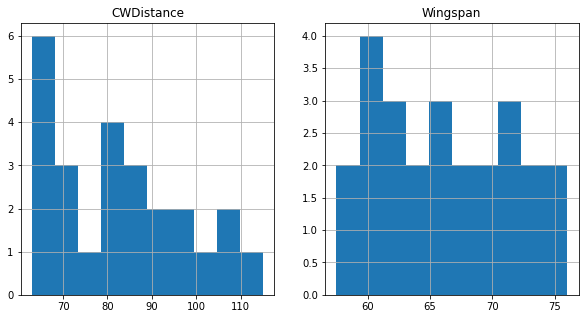

In [36]:
plt.figure(figsize=(10,5))
plt.grid()
plt.subplot(1,2,1)
plt.hist(x=df.CWDistance)
plt.title("CWDistance")
plt.grid()

plt.subplot(1,2,2)
plt.hist(x=df.Wingspan)
plt.title("Wingspan")
plt.grid()

In [37]:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

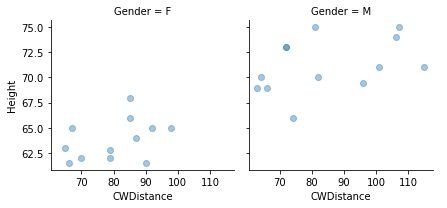

In [40]:
sns.FacetGrid(df, col="Gender").map(plt.scatter,"CWDistance","Height",alpha=0.4).add_legend()

In [47]:
dP = df[(df.Gender=="F")].dropna()
r, p = stats.pearsonr(dP.CWDistance, dP.Wingspan) # -> esta es una forma de gráficar e incluir r y p, pero estos datos deben tener la misma longitud
print("F:",r,"P:",p)
# r -> correlación
# p -> p-valor
dP = df[(df.Gender=="M")].dropna()
r, p = stats.pearsonr(dP.CWDistance, dP.Wingspan) # -> esta es una forma de gráficar e incluir r y p, pero estos datos deben tener la misma longitud
print("M:",r,"P:",p)
# r -> correlación
# p -> p-valor

F: 0.45812100078494783 P: 0.13419996776801232
M: 0.27476207389072843 P: 0.3636081114947553


Podemos ver que la relación entre las variables Distancia y Altura por Género cambian, así, en la asociación Masculina de estas dos variables persiste siendo baja, no obstante, por Género Femenino la asociacion cambia a moderada, estando sobre los 0.46, sin embargo el valor P, nos muestra un 0.4, este resultado nos indica que la hipotesis nula es correcta. 

<AxesSubplot:xlabel='Glasses', ylabel='CWDistance'>

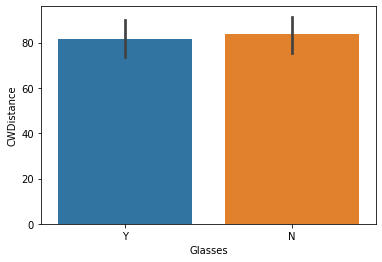

In [50]:
sns.barplot(x=df.Glasses, y=df.CWDistance)

<AxesSubplot:xlabel='Glasses', ylabel='CWDistance'>

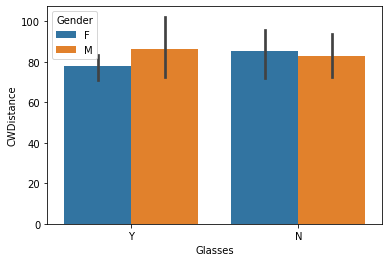

In [53]:
sns.barplot(x=df.Glasses, y=df.CWDistance, hue=df.Gender)

Es mayor el comportamiento de las personas que utilizan gafas bajo una pequeña proporción, repecto a las 